In [1]:
from imp import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

from lib import IO
from lib import Loader
from lib import graph

plt.rcParams['figure.dpi'] = 600

In [2]:
reload(Loader)
reload(graph)
la = Loader.LALoader()
bjh = Loader.BJLoader('highway')
bjm = Loader.BJLoader('metro')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


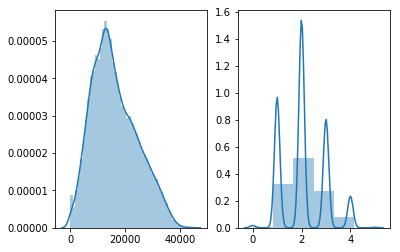

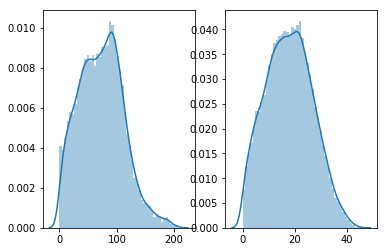

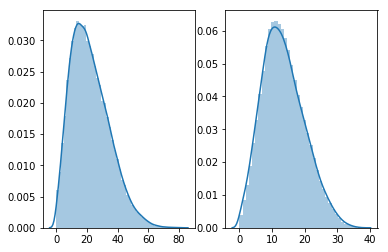

In [14]:
def show_dist_hop(dist, hop):
    plt.figure()
    plt.subplot(121)
    sns.distplot(dist.values.reshape(-1))
    plt.subplot(122)
    sns.distplot(hop.values.reshape(-1), bins=hop.max().max() + 1)

for loader in [la, bjh, bjm]:
    dist = loader.load_dist()
    hop = loader.load_hop()
    show_dist_hop(dist, hop)
plt.show()
    

In [21]:
reload(graph)
node = la.load_node()
link = la.load_link()
G = graph.build_graph(link, node)

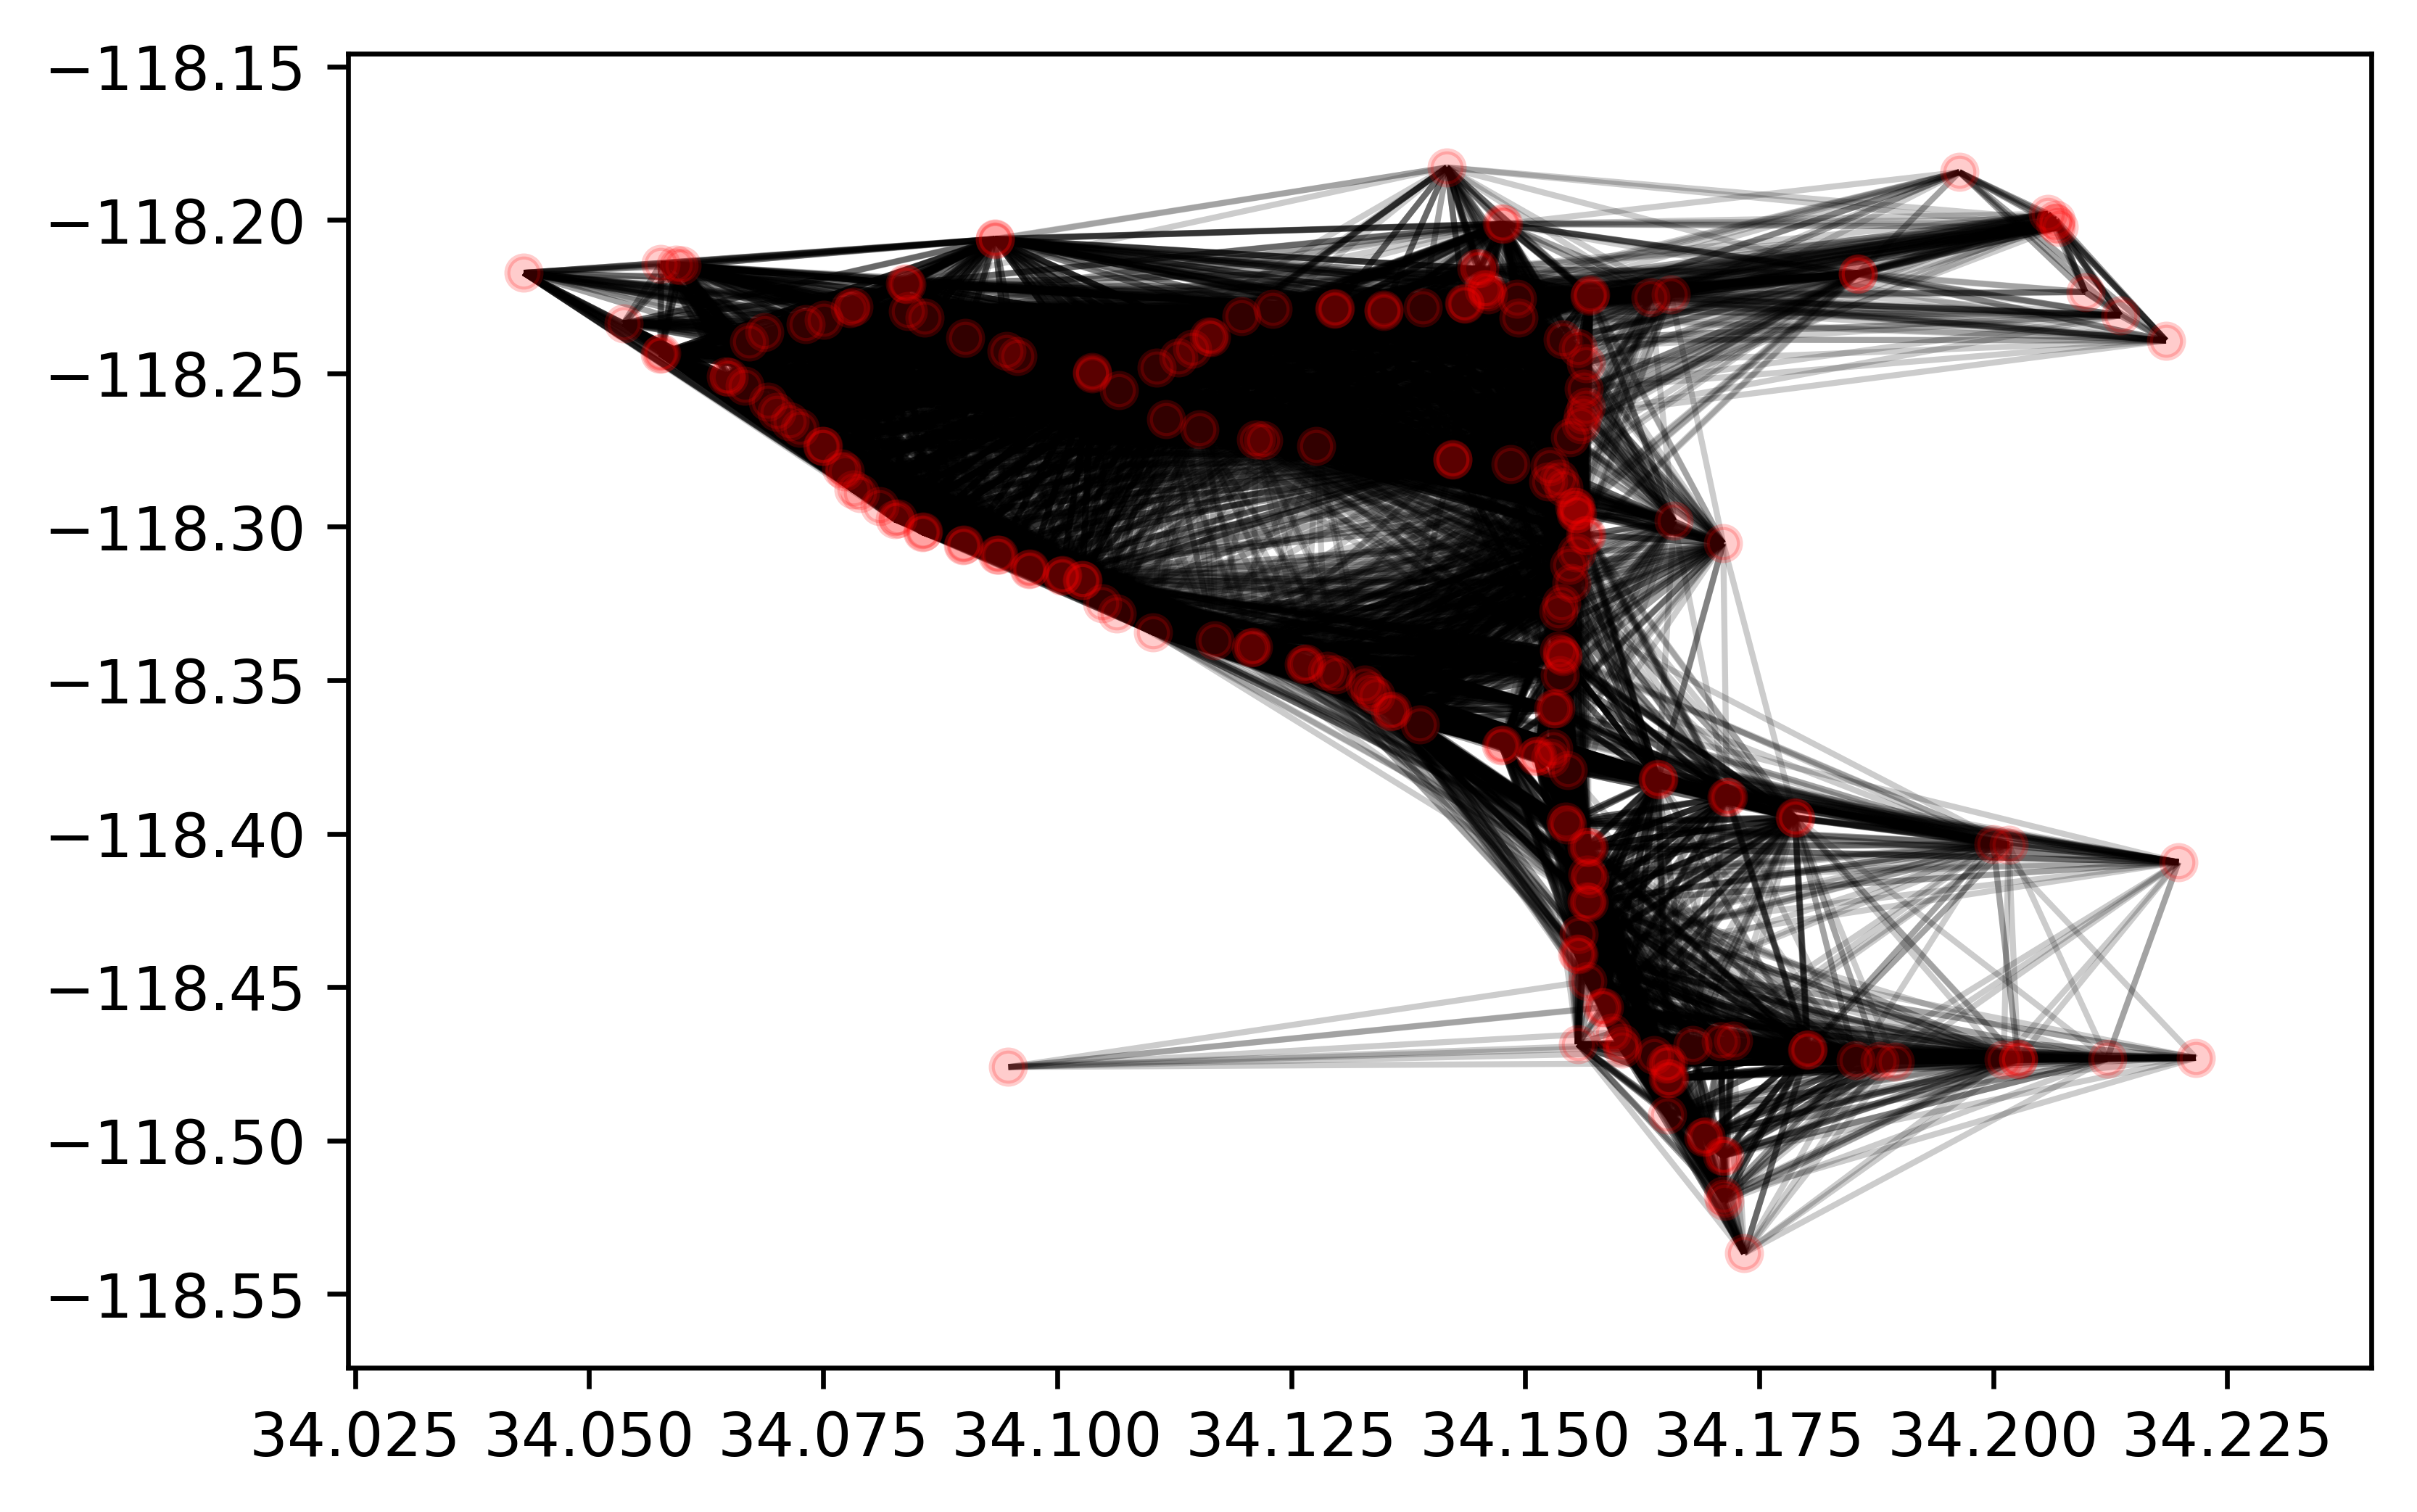

In [20]:
nx.draw_networkx(G, pos=G.pos, width=1, node_size=30, with_labels=False, alpha=0.2, arrows=False)
plt.show()

In [30]:
G.edges[773869, 716554]['head'] = 1

In [40]:
alphas = [G.edges[edge]['weight'] for edge in G.edges()]
alphas = [1. - alpha / max(alphas) for alpha in alphas]
alphas

[0.4421326069960404,
 0.30559128395248536,
 0.41013677671012916,
 0.33764596100981059,
 0.13534757425201549,
 0.2516876413373349,
 0.072238615251401739,
 0.30842433566198413,
 0.38413491042680725,
 0.29697443528116141,
 0.36247089186485415,
 0.3876573100300118,
 0.38210049347221164,
 0.54693870688423152,
 0.79646583104251256,
 0.55027615949156383,
 0.40892621455532852,
 0.61694955150353503,
 0.55974208300757433,
 0.25934612830277504,
 0.493875732432137,
 0.39075096887005789,
 0.36325271325649622,
 0.22622380267836883,
 0.47276655485780095,
 0.67214782308979171,
 0.31781459904331955,
 0.82141686212201459,
 0.61277983741477726,
 0.67886476171260912,
 0.65483005893083823,
 0.18948660395282169,
 0.38276462132102596,
 0.35731759602532087,
 0.92154884702361439,
 0.15110169562768483,
 0.33841096903819146,
 0.18208872411792898,
 0.22378586500550635,
 0.13782754533303065,
 0.10725244424268399,
 0.36337881348095458,
 0.3937689675754289,
 0.18951182399771338,
 0.13797886560238071,
 0.306347885299

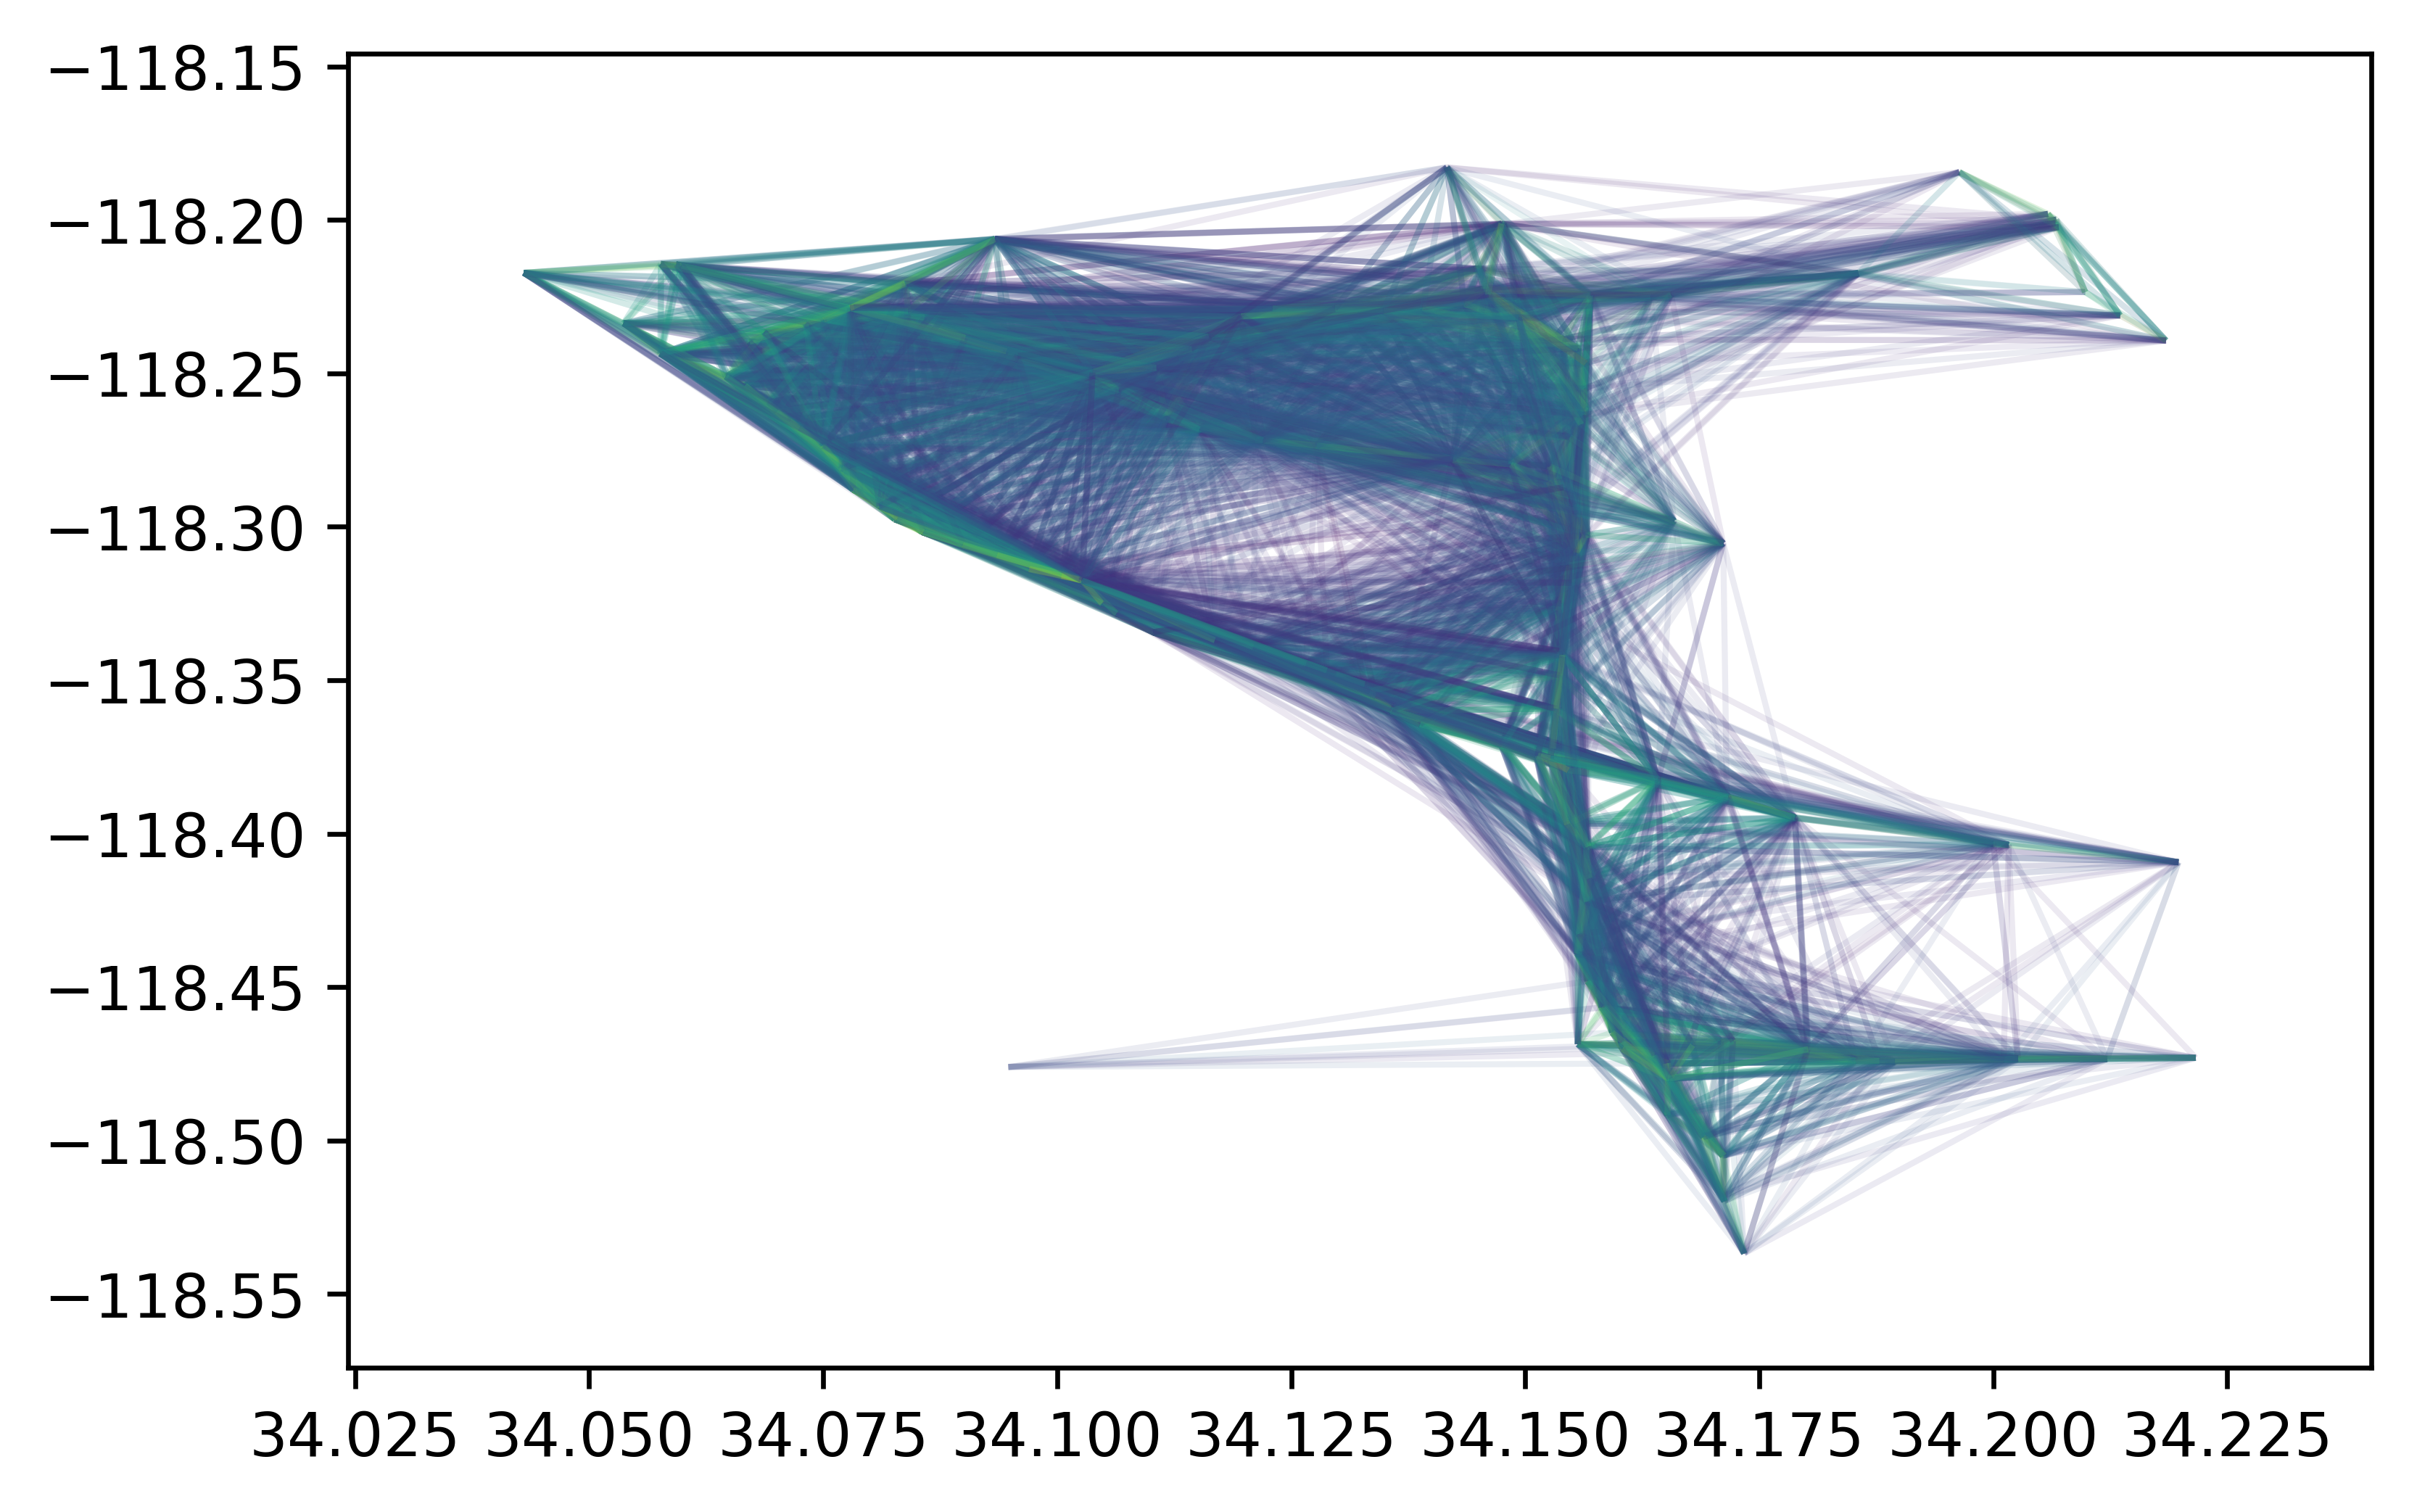

In [46]:
nx.draw_networkx_edges(G, pos=G.pos, edge_color=alphas, width=1, alpha=0.1, arrows=False)
plt.show()